In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load star/quasar dataset
from pandas import read_csv
url = "https://raw.githubusercontent.com/toastmaker/ml4a/main/data/sdss_photo.csv"
# dataset = read_csv("sdss_photo.csv", delimiter=",")
dataset = read_csv(url, delimiter=",")
print(len(dataset))
dataset.head(2)

867


,mag_u,mag_g,mag_r,mag_i,mag_z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840,16.613001,16.492001,star,1.715,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767,17.580000,17.481001,star,1.393,0.572001,0.187000,0.098999


In [3]:
dataset.columns

Index(['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'target', 'u-g', 'g-r',
       'r-i', 'i-z'],
      dtype='object')

In [ ]:
dataset.columns

In [20]:
# split into input (X) and output (Y) variables
# X = dataset[['u-g','g-r','r-i','i-z']]
X = dataset[['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'u-g','g-r','r-i','i-z']]
# X = dataset[['i-z']]
y = dataset['target']
print(X.shape)
print(y.shape)

(867, 9)
(867,)


In [21]:
# turn labels into ordinal numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(np.unique(y))

[0 1]


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
print(X_train.shape, X_test.shape)

(606, 9) (261, 9)


In [24]:
input_dim = X_train.shape[1]

In [58]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

from tensorflow import keras


def createModel(input_dim):
    model = keras.models.Sequential()
# kernel_initializer='uniform'
# kernel_regularizer=regularizers.l1(0.01)
# model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(32, input_dim=input_dim, activation='relu')) #, kernel_regularizer=keras.regularizers.l1(0.01)))
#    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(16, activation='relu')) # , kernel_regularizer=keras.regularizers.l1(0.01)))
#    model.add(keras.layers.Dropout(0.5))
#    model.add(keras.layers.Dense(4, activation='relu'))

###    model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

In [59]:
model = createModel(input_dim)
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                320       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


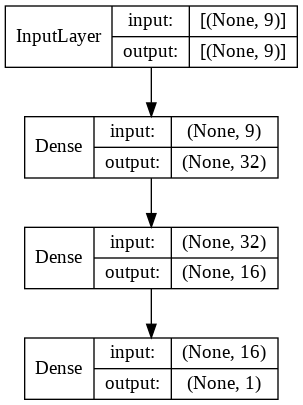

In [61]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False) #, show_layer_activations=True)

In [63]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

fn_model="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath=fn_model, monitor='val_accuracy', save_best_only=True)
# earlystop = EarlyStopping(monitor='loss', patience=3)
# try verbose=1
# callbacks_list = [checkpoint]

In [64]:
# Fit the model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),
          epochs=100, batch_size=20, verbose=0, callbacks=[checkpoint])

In [65]:
! ls weights.best.hdf5
model.load_weights("weights.best.hdf5")


weights.best.hdf5


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


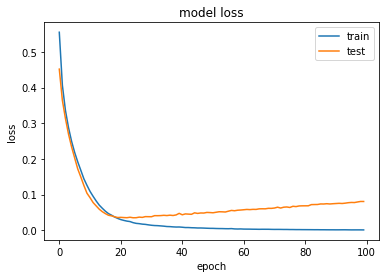

In [66]:
history = model.history
print(history.history.keys())

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')

In [67]:
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9962
accuracy: 99.62%
